In [2]:
from google.colab import files
uploaded=files.upload()

Saving heart.csv to heart.csv


Dataset Shape: (1025, 14)
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  

Training set size: (820, 13)
Testing set size: (205, 13)

Model Performance:
Accuracy : 0.7951219512195122
Precision: 0.7563025210084033
Recall   : 0.8737864077669902


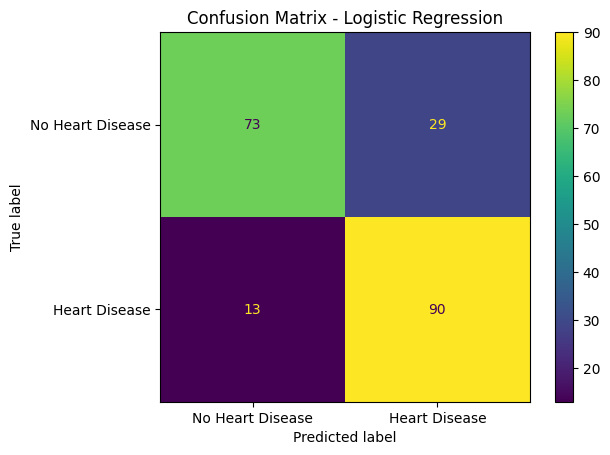

In [6]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix,ConfusionMatrixDisplay

df = pd.read_csv("heart.csv")

print("Dataset Shape:", df.shape)
print(df.head())
X = df.drop("target", axis=1)
y = df["target"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("\nTraining set size:", X_train.shape)
print("Testing set size:", X_test.shape)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("\nModel Performance:")
print("Accuracy :", accuracy)
print("Precision:", precision)
print("Recall   :", recall)
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=["No Heart Disease", "Heart Disease"]
)

disp.plot()
plt.title("Confusion Matrix - Logistic Regression")
plt.show()
